In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# supervised ML because it has known input and output
data=pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.duplicated().sum()

1

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(1337, 7)

In [9]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Neelesha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


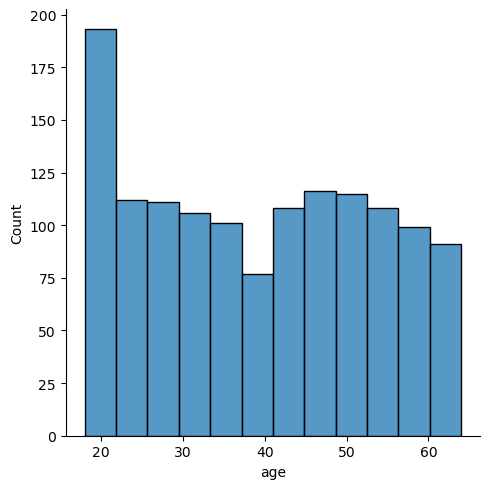

In [10]:
sns.displot(data['age'])

In [11]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [12]:
data.groupby('age')['smoker'].value_counts()

age  smoker
18   no        57
     yes       12
19   no        49
     yes       18
20   no        20
               ..
62   yes        4
63   no        18
     yes        5
64   no        15
     yes        7
Name: count, Length: 94, dtype: int64

In [13]:
# Group by 'sex' and 'region', then apply value_counts to 'smoker'
counts = data.groupby(['sex', 'region'])['smoker'].value_counts().reset_index(name='counts')
print(counts)


       sex     region smoker  counts
0   female  northeast     no     132
1   female  northeast    yes      29
2   female  northwest     no     135
3   female  northwest    yes      29
4   female  southeast     no     139
5   female  southeast    yes      36
6   female  southwest     no     141
7   female  southwest    yes      21
8     male  northeast     no     125
9     male  northeast    yes      38
10    male  northwest     no     131
11    male  northwest    yes      29
12    male  southeast     no     134
13    male  southeast    yes      55
14    male  southwest     no     126
15    male  southwest    yes      37


In [14]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [15]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
data['sex']=data['sex'].map({'female':0, 'male':1})
data['smoker']=data['smoker'].map({'yes':1, 'no':0})
data['region']=data['region'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})

In [18]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


# store features matrix in x and response(target) in vector y

In [19]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [20]:
# let's store inddependent variables
x=data.drop(['charges'],axis=1)
# storing dependent variables
y=data['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

## test/train split
- split the data into two parts: training data and test data
- train the models on the training set
- test the models on testing set

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [23]:
x_train

,age,sex,bmi,children,smoker,region
1070,37,1,37.070,1,1,1
476,24,1,28.500,0,1,3
157,18,1,25.175,0,1,3
16,52,0,30.780,1,0,3
1073,54,0,28.880,2,0,3
...,...,...,...,...,...,...
1096,51,0,34.960,2,1,3
1131,27,1,45.900,2,0,0
1295,20,1,22.000,1,0,0
861,38,0,28.000,3,0,0


# importing the models

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [27]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [28]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

Prediction on test data

In [29]:
y_pred1=lr.predict(x_test)
y_pred2=svr.predict(x_test)
y_pred3=rfr.predict(x_test)
y_pred4=gbr.predict(x_test)

In [30]:
df=pd.DataFrame({'Actual':y_test,'LR':y_pred1,'SVR':y_pred2,'RFR':y_pred3,'GBR':y_pred4})
df

,Actual,LR,SVR,RFR,GBR
900,8688.85885,7819.242472,9102.067711,12909.612462,9252.102198
1064,5708.86700,5266.590103,9067.837558,6966.900926,8049.779019
1256,11436.73815,14299.290952,9104.798214,10163.213080,12376.331831
298,38746.35510,32132.224953,9070.162541,41843.039786,40543.318360
237,4463.20510,8439.636026,9070.246419,4286.172915,5748.000752
...,...,...,...,...,...
496,4931.64700,4188.083894,9070.955661,5597.028549,6326.039449
1157,14426.07385,2761.573175,9061.288525,5827.406094,4576.383985
1123,18903.49141,6455.450448,9064.557079,4243.165722,4127.332995
1197,5699.83750,8493.371962,9087.208915,6088.348555,6132.717730


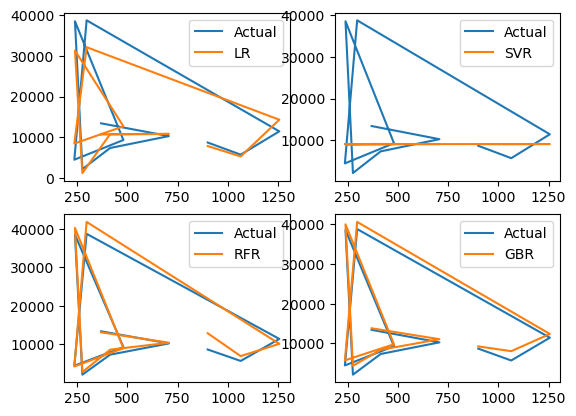

In [31]:
plt.subplot(221)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['LR'].iloc[0:11],label='LR')
plt.legend()

plt.subplot(222)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['SVR'].iloc[0:11],label='SVR')
plt.legend()

plt.subplot(223)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['RFR'].iloc[0:11],label='RFR')
plt.legend()

plt.subplot(224)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['GBR'].iloc[0:11],label='GBR')
plt.legend()

# Evaluating Algorithm

In [32]:
from sklearn import metrics

In [37]:
# r2_score:coeff of dett/goodness of fit
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

print(score1,score2,score3,score4)

0.7495259270293191 -0.12233653619742024 0.8352815935211861 0.8251078529179335


In [40]:
# mean absolute error

abs1=metrics.mean_absolute_error(y_test,y_pred1)
abs2=metrics.mean_absolute_error(y_test,y_pred2)
abs3=metrics.mean_absolute_error(y_test,y_pred3)
abs4=metrics.mean_absolute_error(y_test,y_pred4)

print(abs1,abs2,abs3,abs4)

4110.486343460308 8389.880666500265 2721.438916727944 2834.4439011550717


In [42]:
# mean squared erroe

mse1=metrics.mean_squared_error(y_test,y_pred1)
mse2=metrics.mean_squared_error(y_test,y_pred2)
mse3=metrics.mean_squared_error(y_test,y_pred3)
mse4=metrics.mean_squared_error(y_test,y_pred4)

print(mse1,mse2,mse3,mse4)

36966593.20508721 165641727.6277259 24310214.041216422 25811720.867028847


# predict charges for new customers

In [44]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [47]:
data1={'age':40, 'sex':1, 'bmi':40.3, 'children':3, 'smoker':0, 'region':1}
df1=pd.DataFrame(data1,index=[0])
df1

,age,sex,bmi,children,smoker,region
0,40,1,40.3,3,0,1


In [49]:
new_predict=gbr.predict(df1)
print(new_predict)

[8514.93823289]


# save model using joblib

In [50]:
gbr= GradientBoostingRegressor()
gbr.fit(x,y)

GradientBoostingRegressor()

In [51]:
import joblib

In [52]:
joblib.dump(gbr,'model_gbr')

['model_gbr']

In [53]:
model=joblib.load('model_gbr')

In [54]:
model.predict(df1)

array([7151.11316165])

# GUI

In [56]:
from tkinter import *

In [ ]:
def show_entry():
    p1= float(e1.get())
    p2= float(e2.get())
    p3= float(e3.get())
    p4= float(e4.get())
    p5= float(e5.get())
    p6= float(e6.get())
    
    model =joblib.load('model_gbr')
    result=model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master,text='Insurance Cost').grid(row=8)
    Label(master, text=result).grid(row=9)


master = Tk()
master.title("Insurance Cost Prediction")
label = Label(master,text ="Insurance Cost Prediction", bg='black',fg='white').grid(row=0,columnspan=2)

Label(master,text="Enter Your Age").grid(row=1)
Label(master,text="Male or Female [1/0]").grid(row=2)
Label(master,text='Enter Your BMI Value').grid(row=3)
Label(master,text='Enter Number of Children').grid(row=4)
Label(master,text='Smoker Yes/No [1/0]').grid(row=5)
Label(master,text='Region [1-4]').grid(row=6)

e1= Entry(master)
e2= Entry(master)
e3= Entry(master)
e4= Entry(master)
e5= Entry(master)
e6= Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

Button(master,text='Predict',command=show_entry).grid()

mainloop()

C:\Users\Neelesha\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
